In [ ]:
import os
import torch
from torch import nn
from torchvision import datasets,transforms
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.nn.functional as F




KeyboardInterrupt: 

In [ ]:
transform = transforms.ToTensor()



In [ ]:
train_data = datasets.FashionMNIST(root='data',train=True,download=True,transform=transform)
test_data = datasets.FashionMNIST(root='data',train=False,download=True,transform=transform)



In [ ]:
# train_data
# test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
labels = ["T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot"]


In [ ]:
image, label = train_data[1600]
# image.shape
label

print(f"Shape of the image is {image.shape} and image is of {labels[label]}")


Shape of the image is torch.Size([1, 28, 28]) and image is of Dress


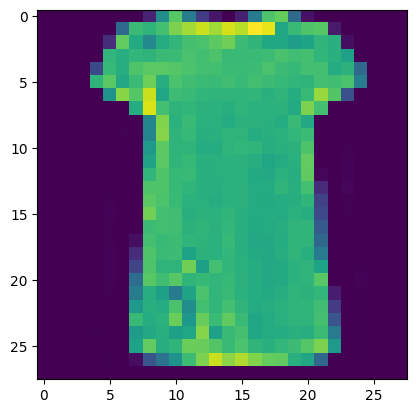

In [ ]:
plt.imshow(image.reshape(28,28))

In [ ]:
def plt_sample(index):
  image ,label = train_data[index]
  plt.imshow(image.reshape(28,28))
  plt.title(f"label :{labels[label]}")

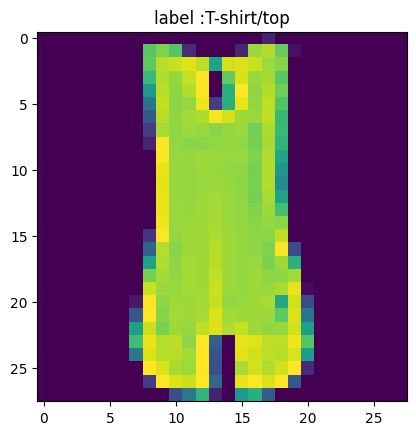

In [ ]:
plt_sample(4)

In [ ]:
torch.manual_seed(101)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=500, shuffle=False)




In [ ]:
class ann(nn.Module):
  def __init__(self,input_sz=784,output_size=10,layers=[120,84]):
    super().__init__()
    self.fc1 = nn.Linear(input_sz,layers[0])
    self.fc2 = nn.Linear(layers[0],layers[1])
    self.fc3 = nn.Linear(layers[1],output_size)

  def forward(self,X):
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X,dim=1)


In [ ]:
torch.manual_seed(101)
model = ann()
model

ann(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# Load the first batch, print its shape
for images, labels in train_loader:
    print('Batch shape:', images.size())
    break

images.view(100,-1).size()

Batch shape: torch.Size([100, 1, 28, 28])


torch.Size([100, 784])

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
epochs = 15  # You can change this value based on your needs

for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for inputs, labels in train_loader:  # Iterate over batches in the train_loader
        optimizer.zero_grad()  # Zero the gradients to prevent accumulation

        # Forward pass
        outputs = model(inputs.view(inputs.size(0), -1))  # Flatten the inputs if necessary
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()  # Compute gradients
        optimizer.step()  # Update parameters

        running_loss += loss.item() * inputs.size(0)  # Accumulate the loss for each batch

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

# After training, you can evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation for evaluation
    for inputs, labels in test_loader:
        outputs = model(inputs.view(inputs.size(0), -1))
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Epoch 1/15, Loss: 1.6433
Epoch 2/15, Loss: 1.6424
Epoch 3/15, Loss: 1.6395
Epoch 4/15, Loss: 1.6379
Epoch 5/15, Loss: 1.6381
Epoch 6/15, Loss: 1.6366
Epoch 7/15, Loss: 1.6356
Epoch 8/15, Loss: 1.6333
Epoch 9/15, Loss: 1.6335
Epoch 10/15, Loss: 1.6335
Epoch 11/15, Loss: 1.6307
Epoch 12/15, Loss: 1.6301
Epoch 13/15, Loss: 1.6285
Epoch 14/15, Loss: 1.6288
Epoch 15/15, Loss: 1.6287
Test Accuracy: 80.84%


In [ ]:
# predicted = torch.max(y_pred.data, 1)[1]

NameError: name 'y_pred' is not defined